# 2nd Mini Project - Fetal Health Classification

### Problem:

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

#### Data:

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes: "Normal", "Suspect" & "Pathological". Dataset having the following features:

- baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of light decelerations (LDs) per second
- severe_decelerations: Number of severe decelerations (SDs) per second
- prolongued_decelerations: Number of prolonged decelerations (PDs) per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability: Mean value of long term variability
- histogram_width: Width of histogram made using all values from a record
- histogram_min: Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks: Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeros in the exam histogram
- histogram_mode: Histogram mode
- histogram_mean: Histogram mean
- histogram_median: Histogram median
- histogram_variance: Histogram variance
- histogram_tendency: Histogram tendency
- fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological. 

### Importing Libraries

In [86]:
#pip install imbalanced-learn

In [196]:
#pip install yellowbrick

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


### Loading Data

In [3]:
data = pd.read_csv(R'/Users/martahuhoja/Documents/IOD/Mini_project/fetal_health.csv')
# Read CSV

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


### Basic EDA

In [6]:
data.shape

(2126, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [9]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


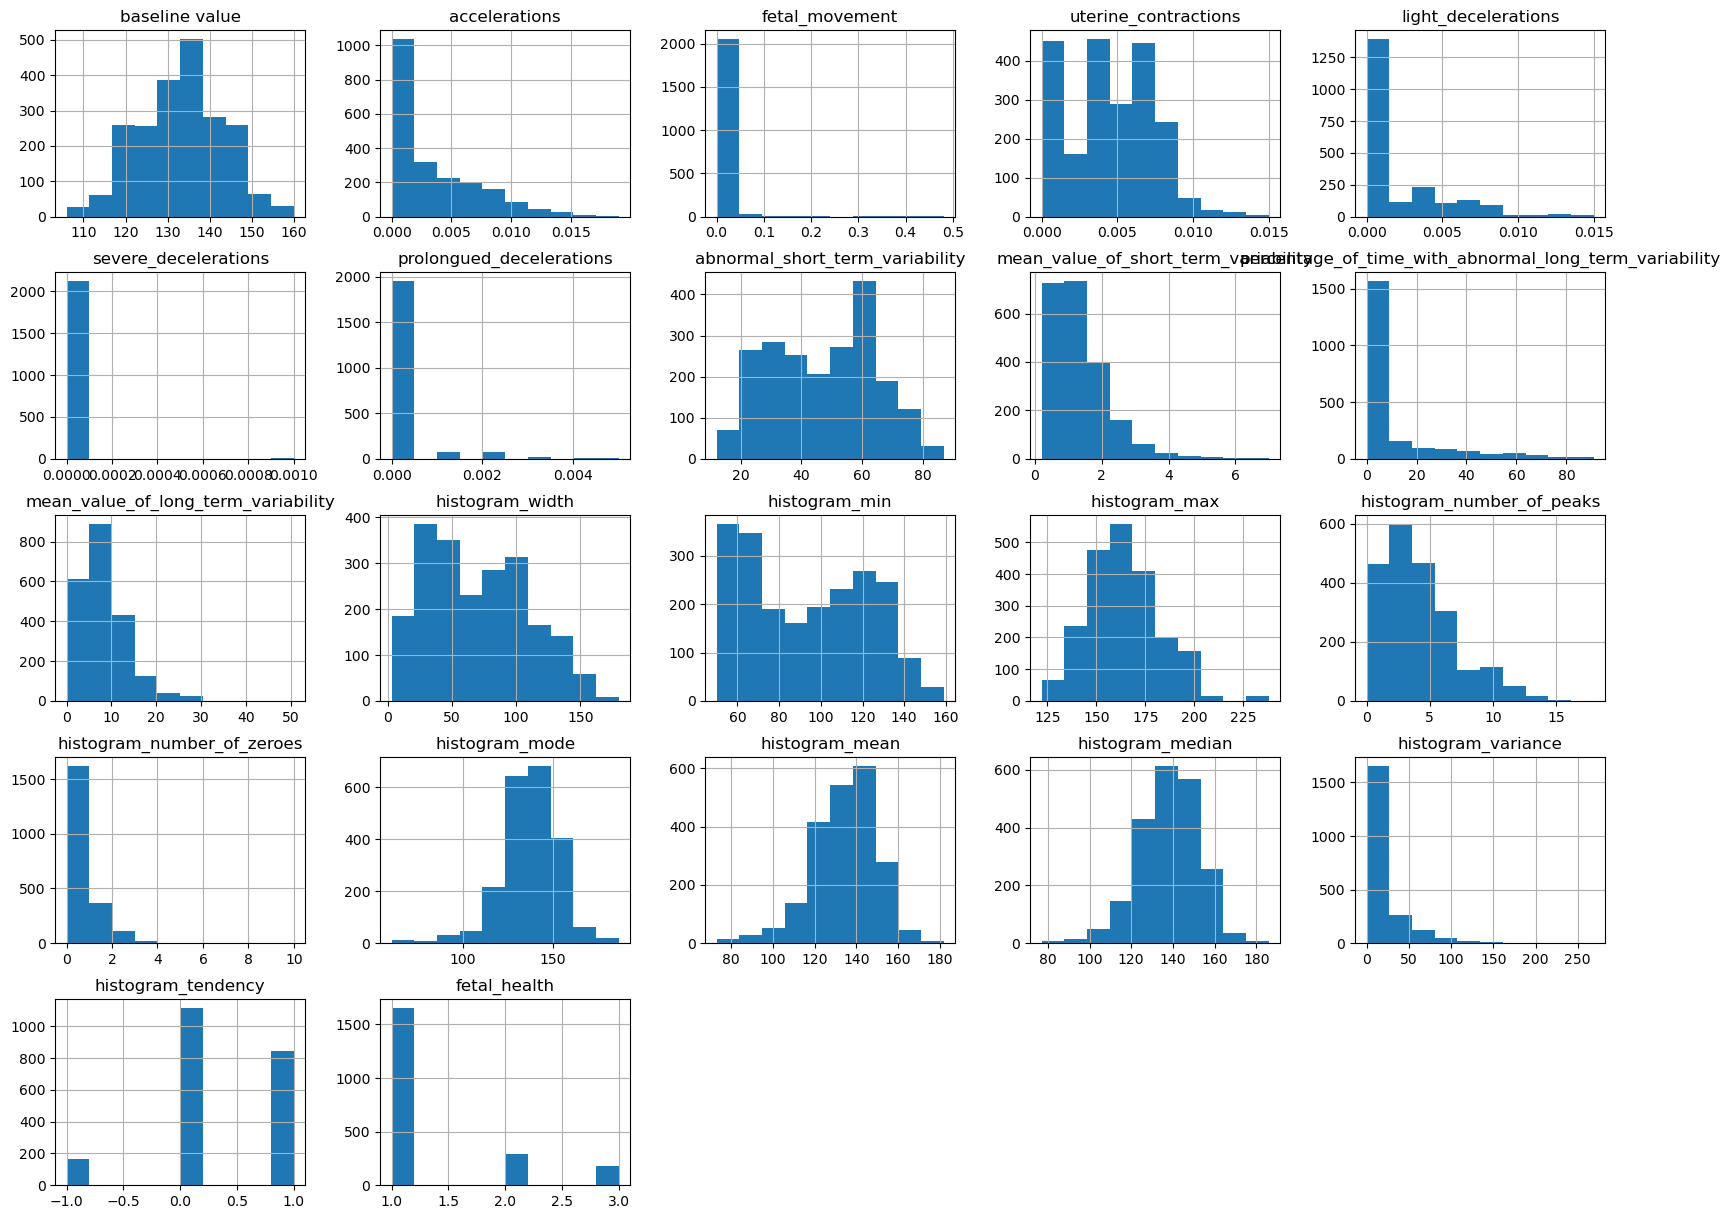

In [11]:
data.hist(figsize=(20,15))
plt.show()

This dataset has 22 columns and 2126 rows. All columns are numerical. There are no null values. Some values are really small (<1) and other go up to >250 so scaler will have to be applied. 

#### Exploring multiple variables

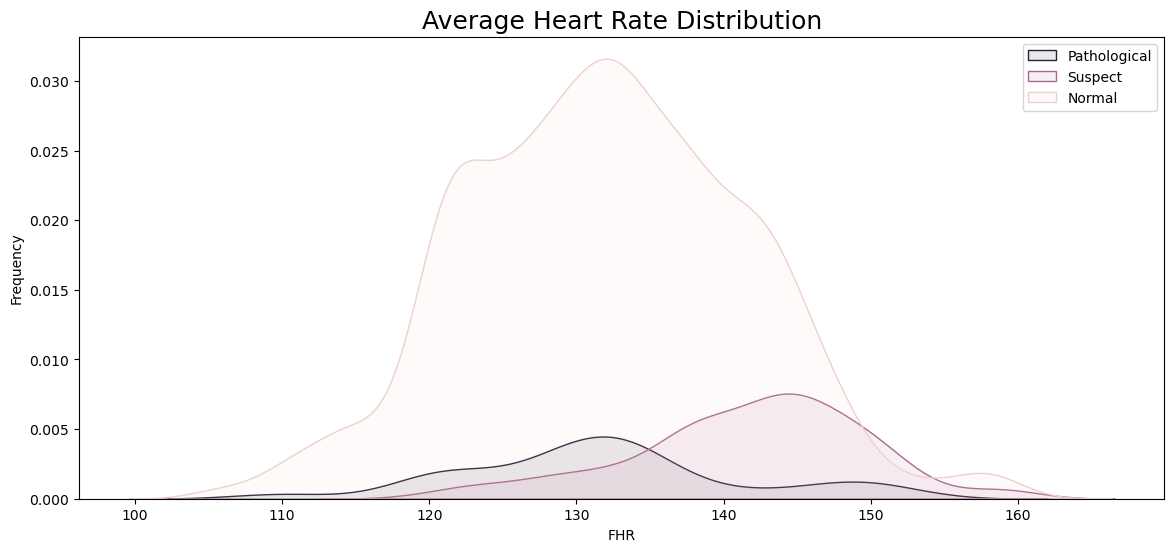

In [106]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["baseline value"], alpha=0.1,shade = True, ax = ax, hue=data['fetal_health'])
plt.title('Average Heart Rate Distribution', fontsize = 18)
ax.set_xlabel("FHR")
ax.set_ylabel("Frequency")


ax.legend(['Pathological','Suspect','Normal'])

plt.show()

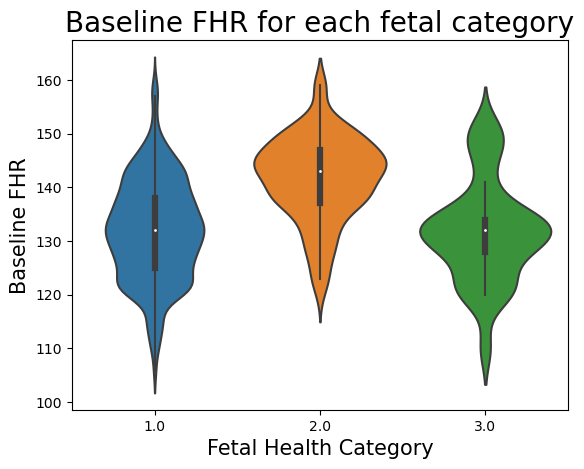

In [111]:
sns.violinplot(data=data, x="fetal_health", y="baseline value")
plt.title('Baseline FHR for each fetal category', fontsize=20)
plt.xlabel('Fetal Health Category', fontsize=15)
plt.ylabel('Baseline FHR', fontsize=15);

Prediction was that that there will be difference in heart rate among differewnt classes. 
There are no big differences between heart reat for three classes; suspect (2) has a bit higher baseline values. 

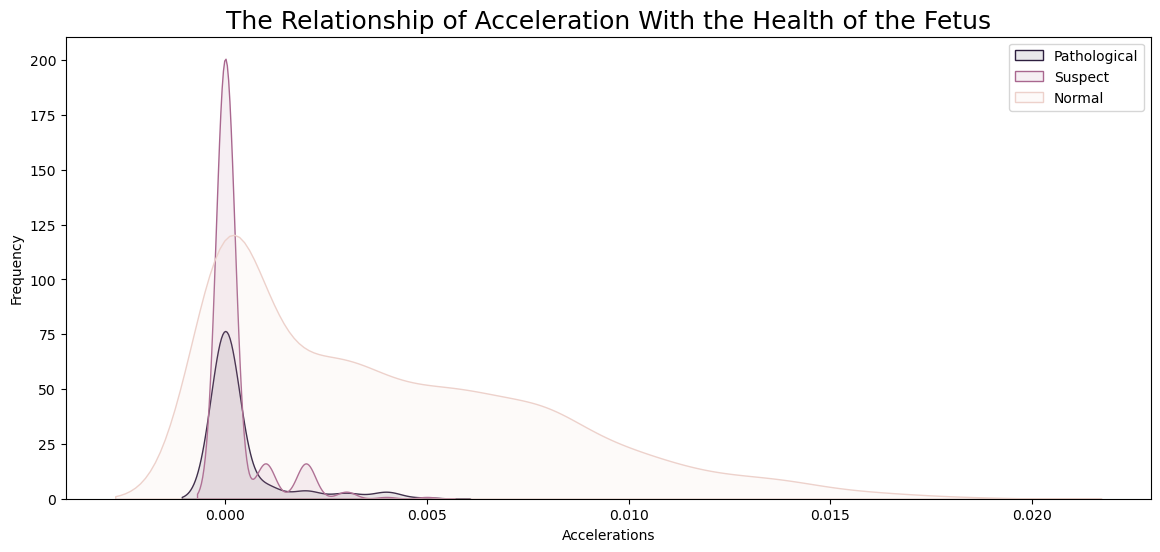

In [107]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["accelerations"], alpha=0.1,shade = True, ax = ax, hue=data['fetal_health'])
plt.title('The Relationship of Acceleration With the Health of the Fetus', fontsize = 18)
ax.set_xlabel("Accelerations")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

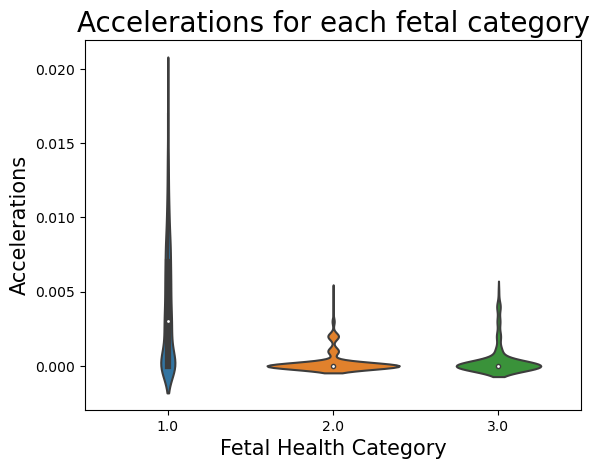

In [113]:
sns.violinplot(data=data, x="fetal_health", y="accelerations")
plt.title('Accelerations for each fetal category', fontsize=20)
plt.xlabel('Fetal Health Category', fontsize=15)
plt.ylabel('Accelerations', fontsize=15);

Fetal heart accelerations are an indication of normal neurological function, pathological and suspect classes have overall lower accelerations. 

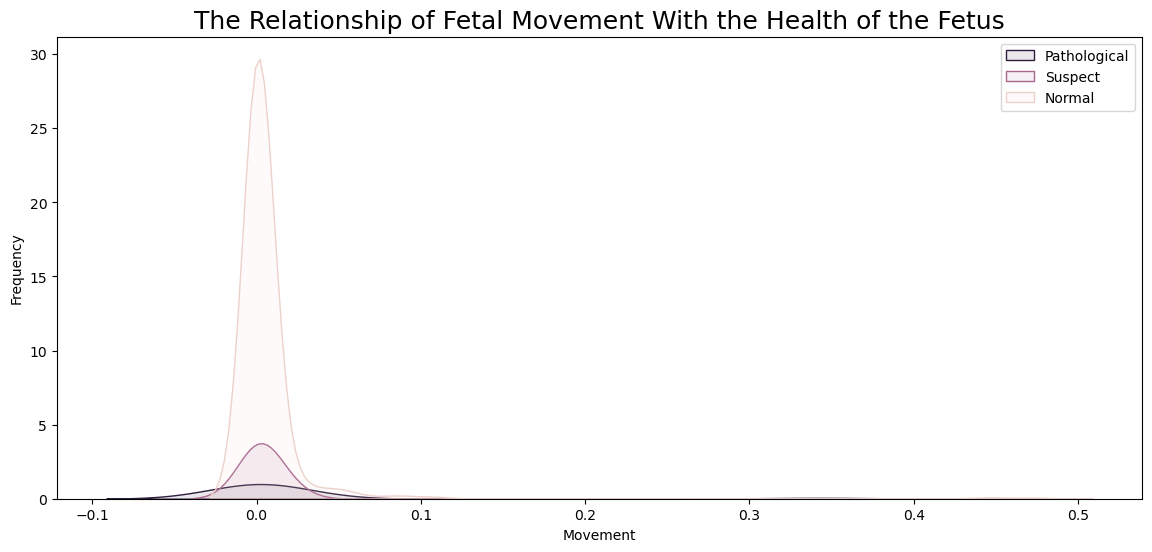

In [149]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["fetal_movement"], alpha=0.1,shade = True, ax = ax, hue=data['fetal_health'])
plt.title('The Relationship of Fetal Movement With the Health of the Fetus', fontsize = 18)
ax.set_xlabel("Movement")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

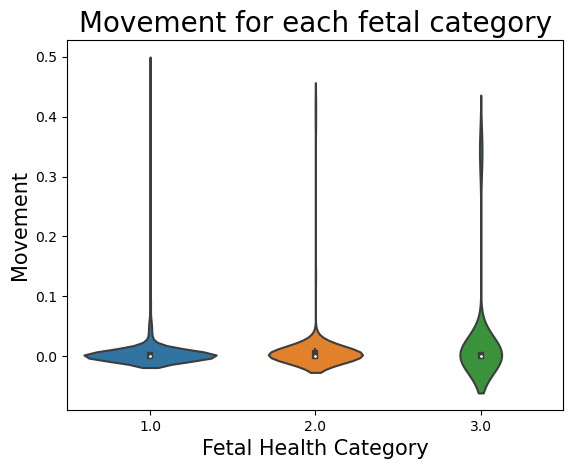

In [150]:
sns.violinplot(data=data, x="fetal_health", y="fetal_movement")
plt.title('Movement for each fetal category', fontsize=20)
plt.xlabel('Fetal Health Category', fontsize=15)
plt.ylabel('Movement', fontsize=15);

Fetal movement is not showing valuable differences based on class. 

### Exploring correlation

In [87]:
data.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


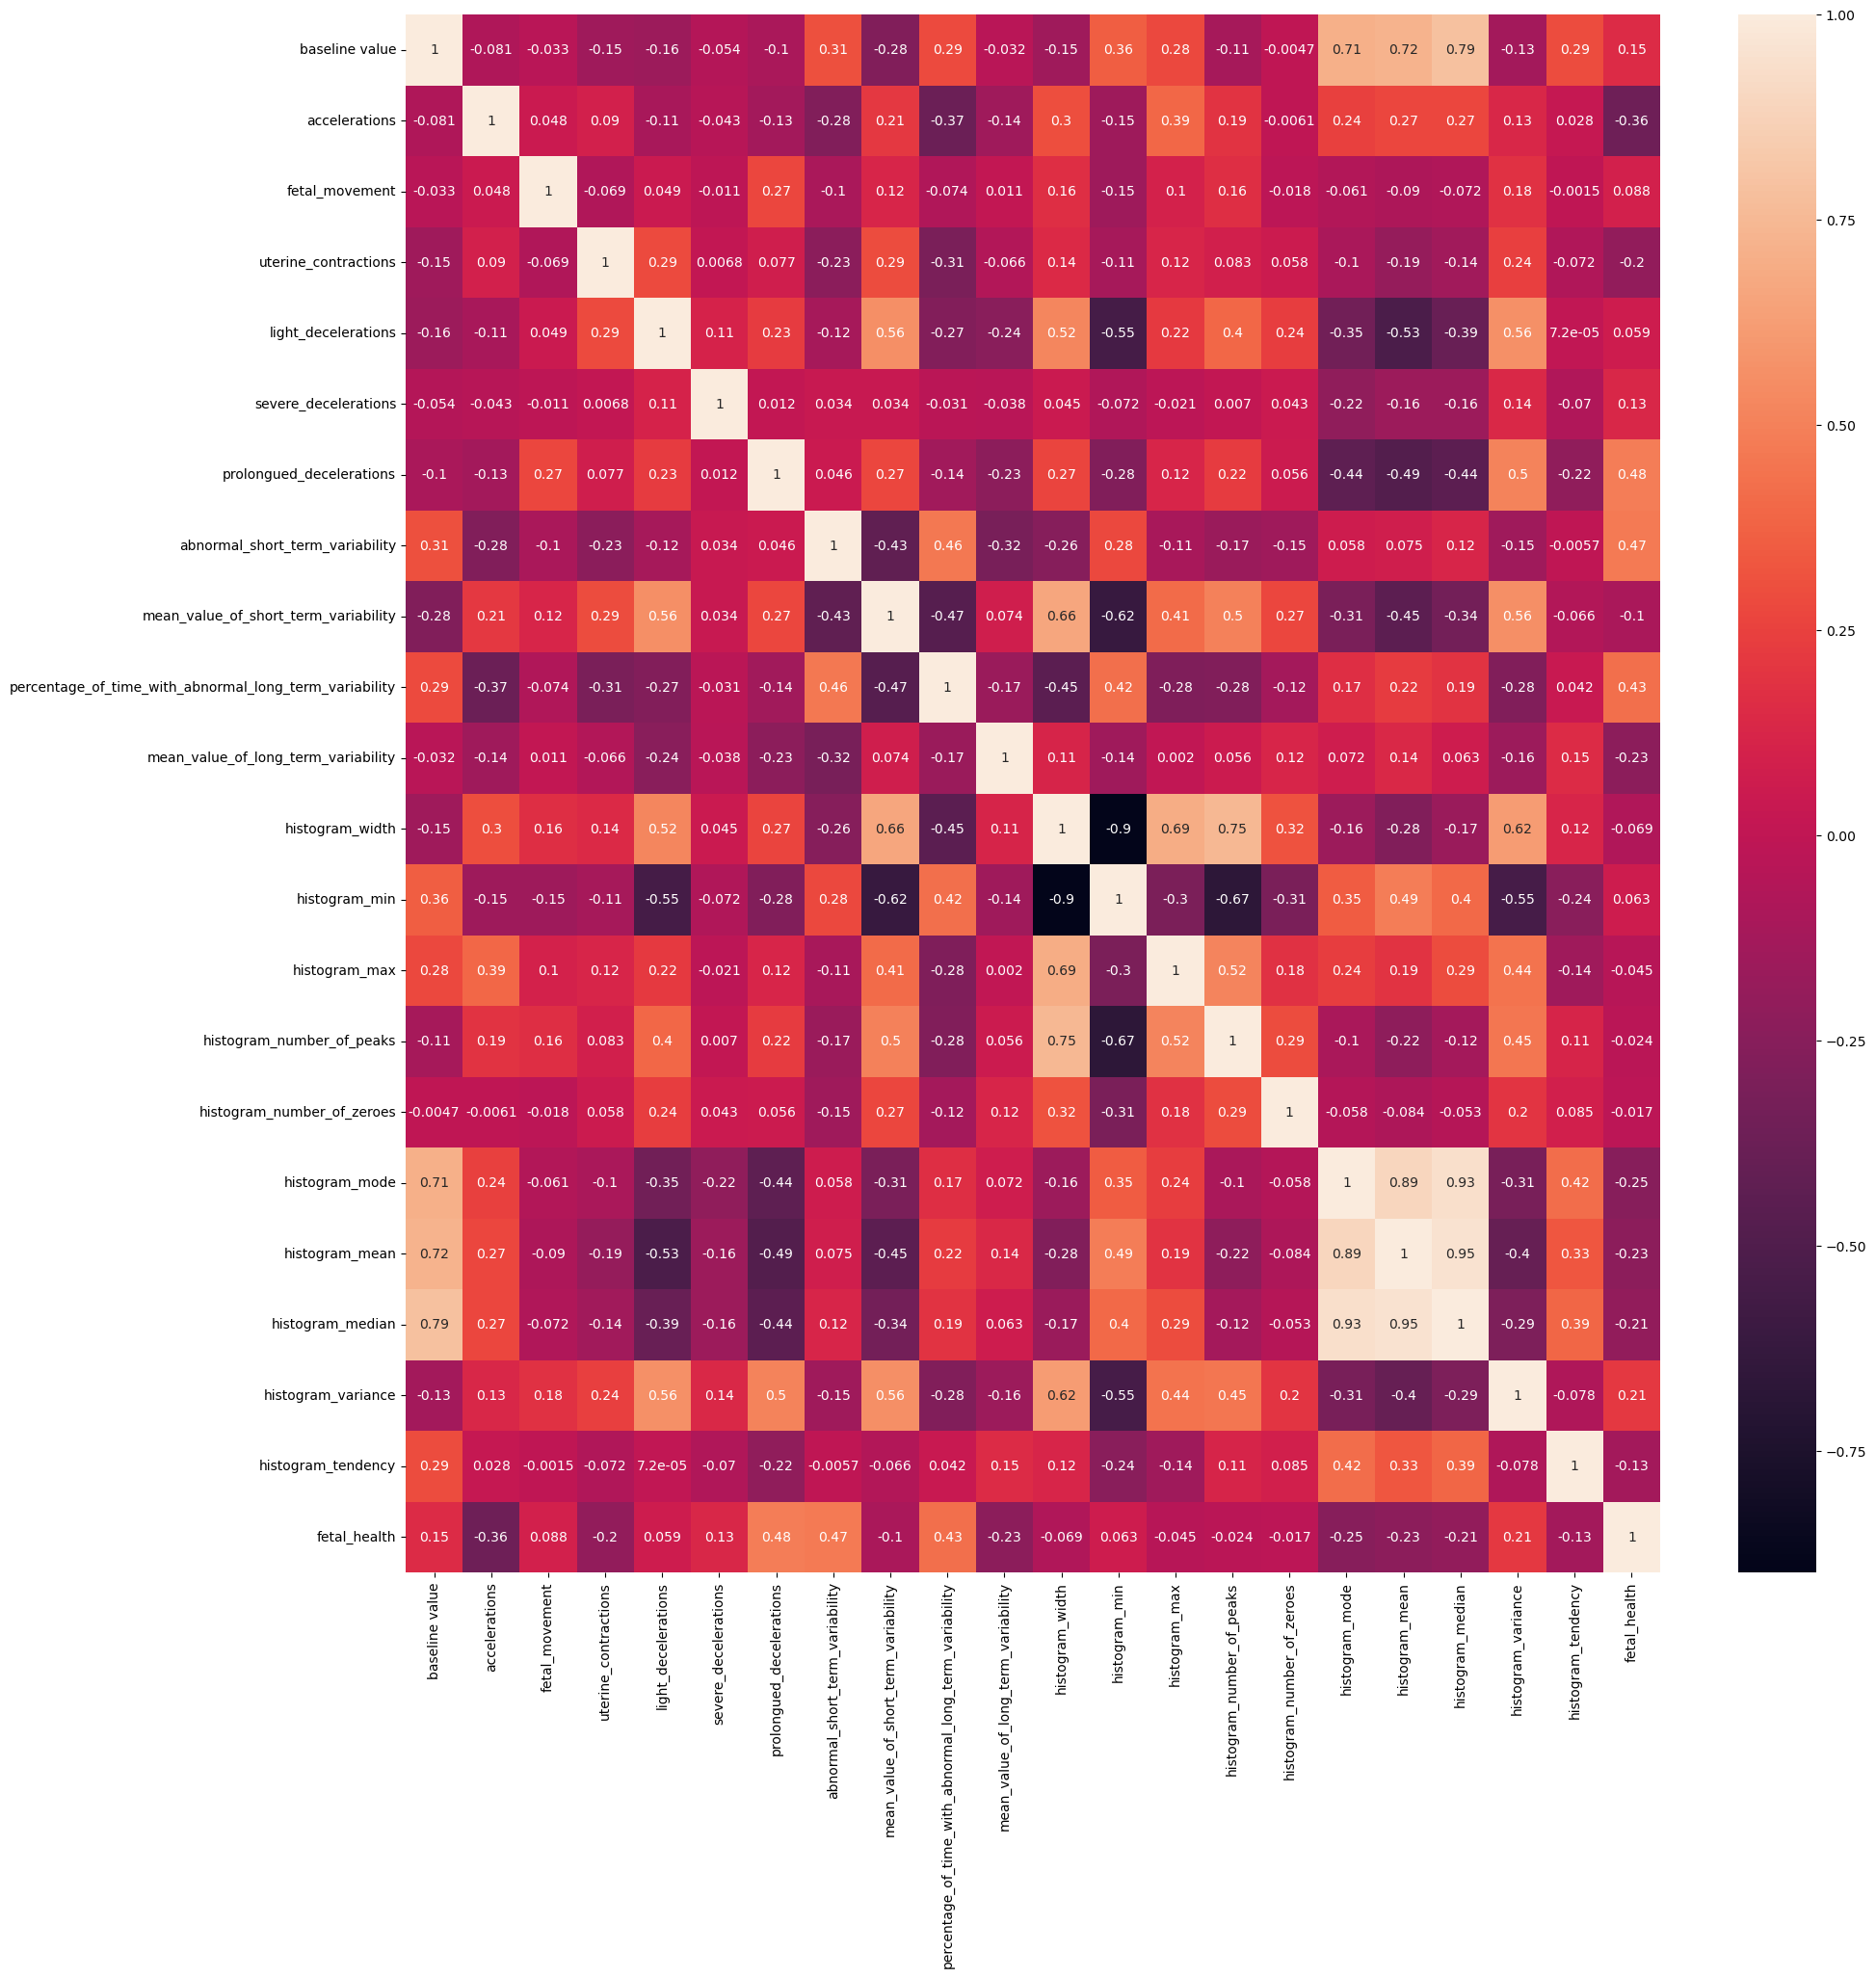

In [13]:
corr= data.corr()

f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(corr,annot=True)
plt.show()

Some of the features are highly correlated between themselves  (baseline value and histogram mean/mode/medium; histogram min and historam width). Correlation with fetal_health (target value) will be explored further. 

### Exploring target variable Fetal health

In [88]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

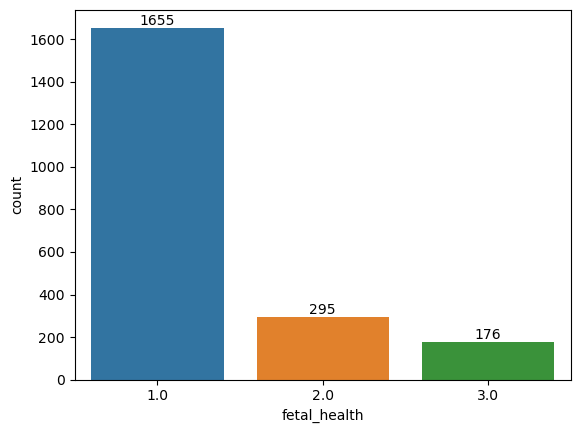

In [15]:
ax = sns.countplot(data=data, x="fetal_health")
ax.bar_label(ax.containers[0])
plt.show()

There are three classes in target variable fetal_health. 1-Normal; 2-Suspect; 3-Pathological. Data is imbalanced so STOME technic will be applied. 

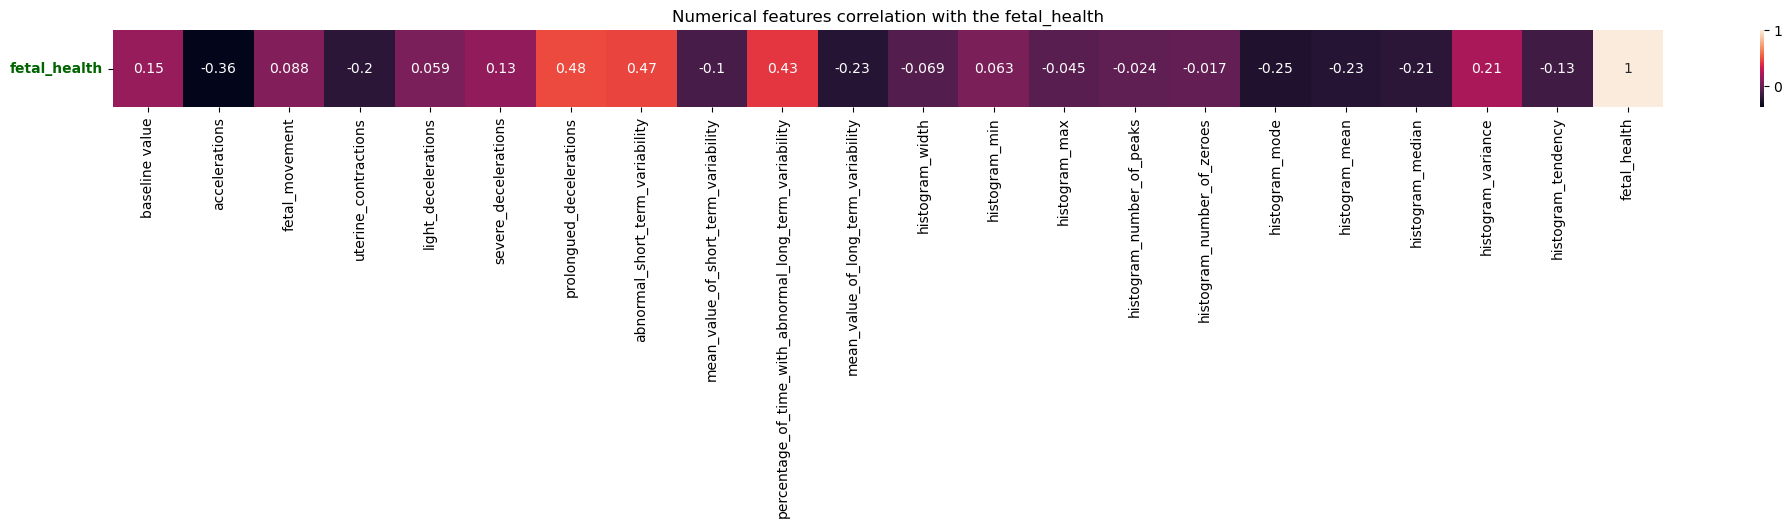

In [18]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), annot=True)
plt.title("Numerical features correlation with the fetal_health")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

Correlation of fetal_health and other variables. Highest correlations with: prolongued_decelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability.

##### Exploring their impact on fetal movement

In [ ]:
#trying to find best way how to show impact of most correlated values - unsuccessful. 

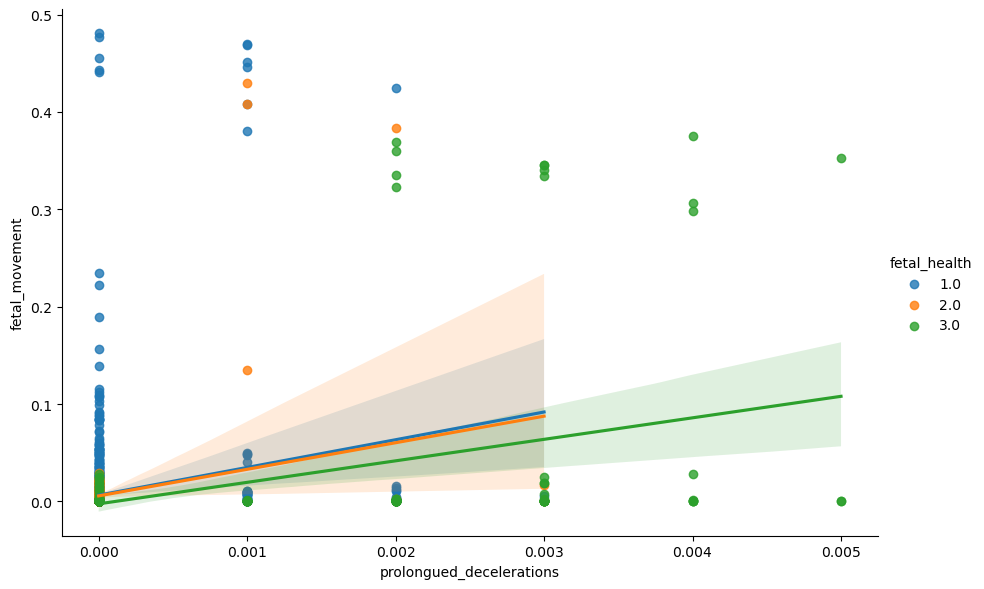

In [143]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",  height=6, aspect=1.5)
plt.show()

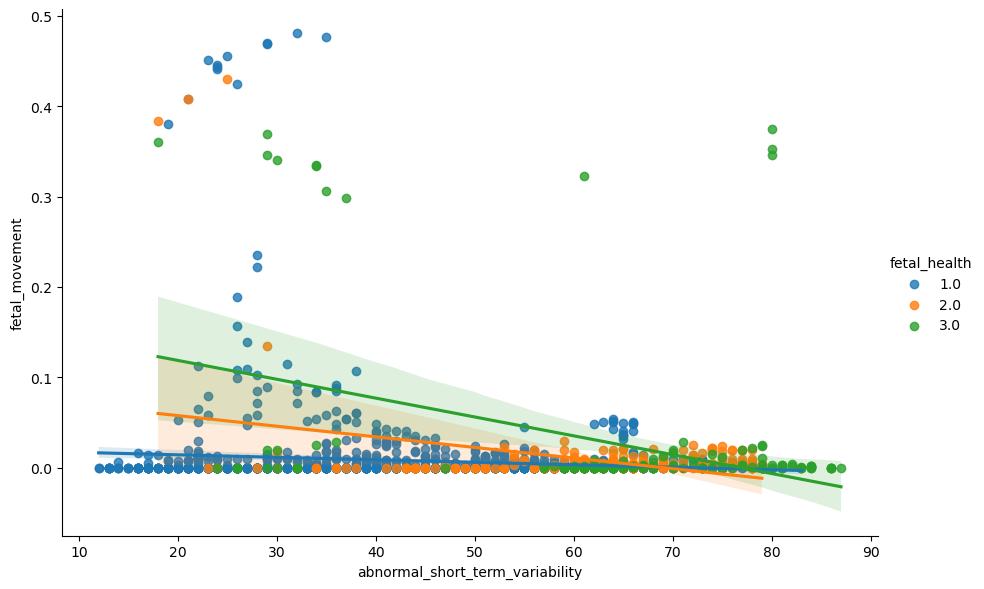

In [159]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement", hue="fetal_health", height=6, aspect=1.5 )
plt.show()

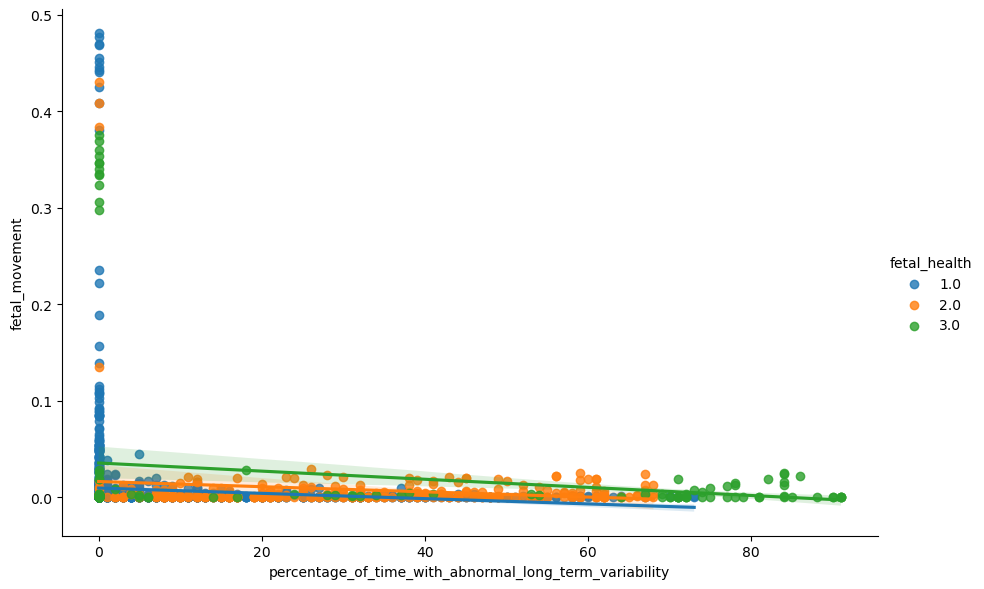

In [145]:
sns.lmplot(data =data,x="percentage_of_time_with_abnormal_long_term_variability",y="fetal_movement", hue="fetal_health", height=6, aspect=1.5)
plt.show()

### Distribution of data before and after applying standard scaler 

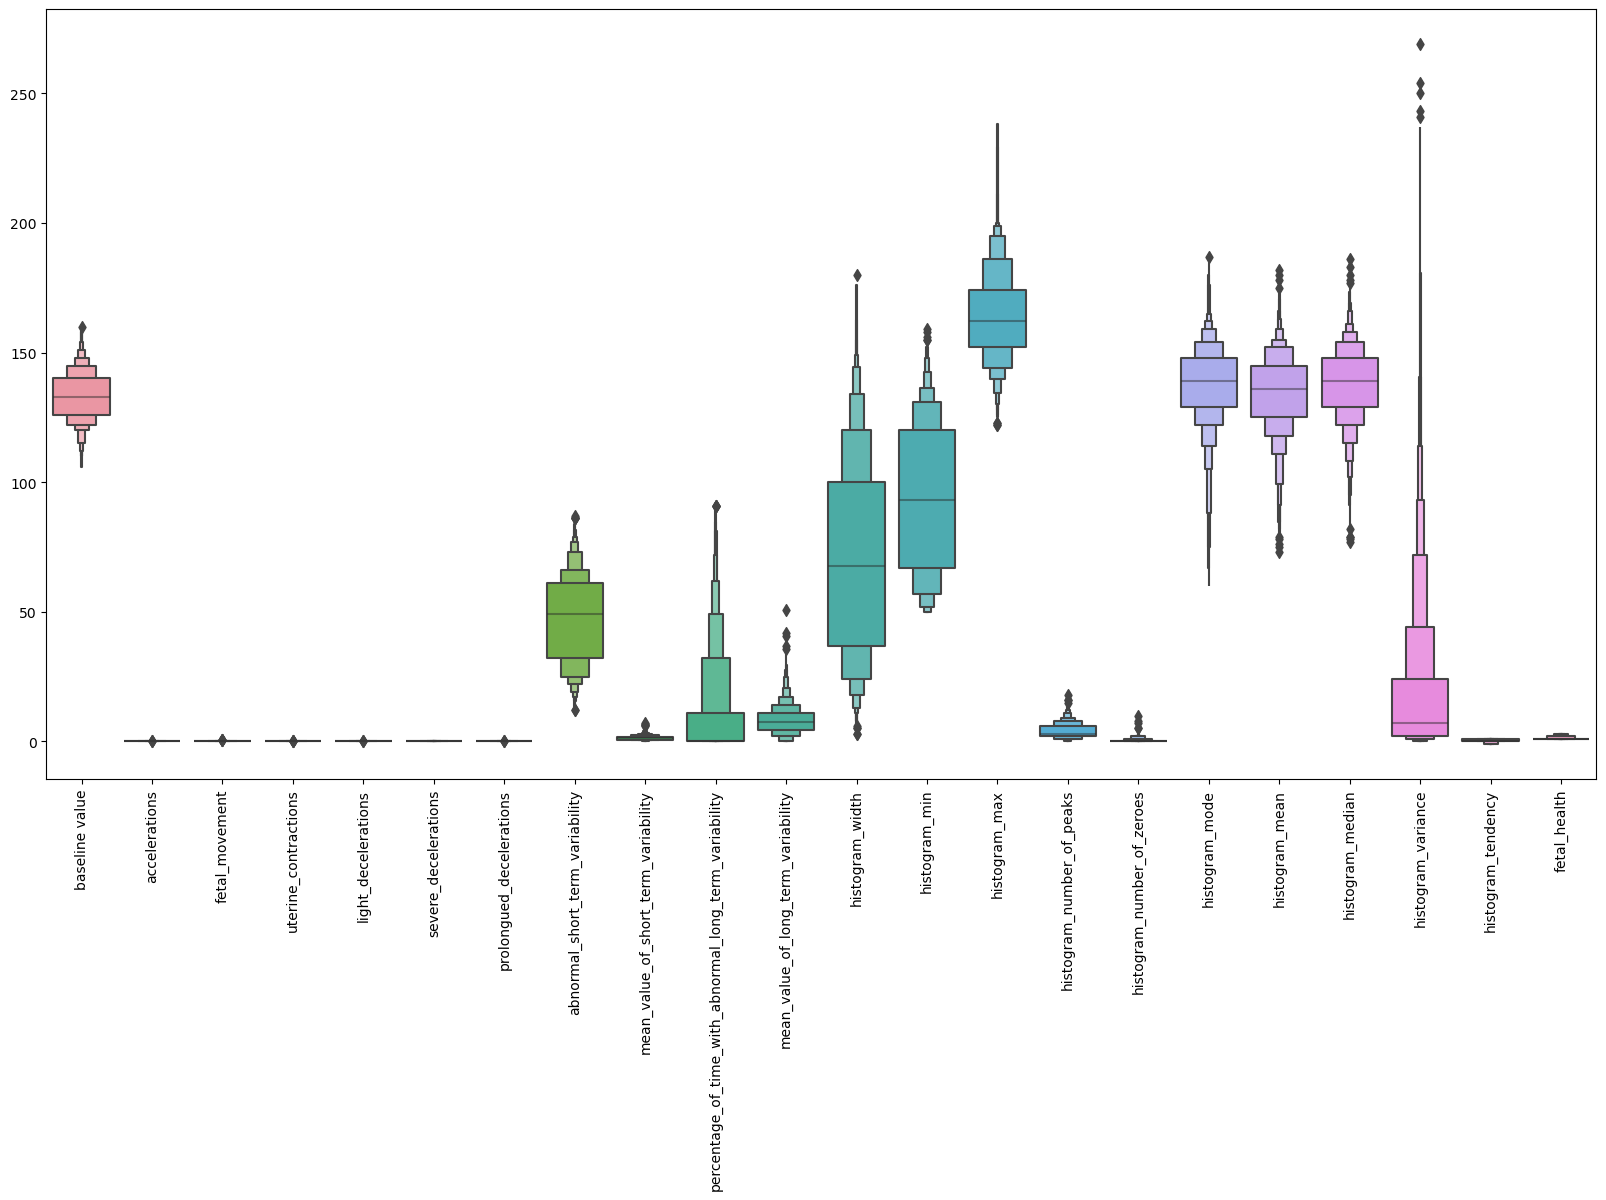

In [19]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data)
plt.xticks(rotation=90)
plt.show()

As already mentioned above, data is not egually distributed. Visual above shows distributin for each variable. 

In [20]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns) #Defining X

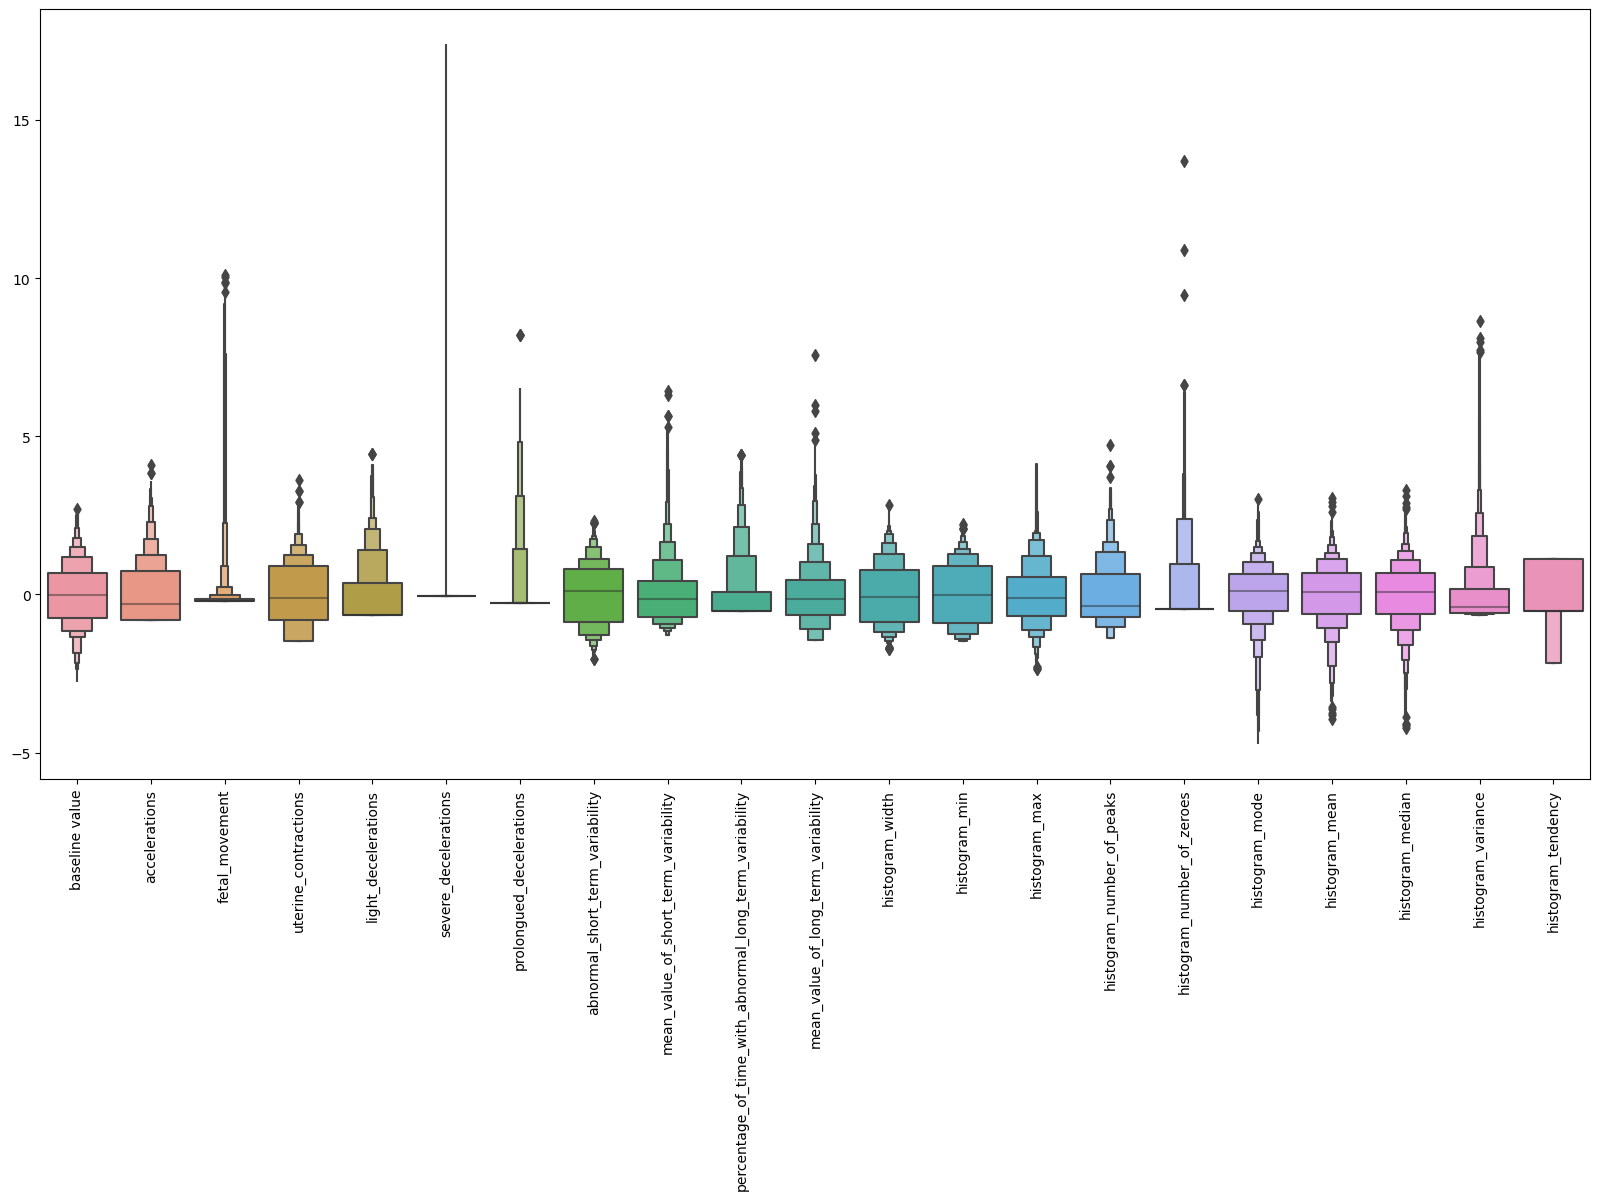

In [21]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=90)
plt.show()

Distirbution of data after applying StandardScaler. 

In [22]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [23]:
y = data["fetal_health"]

### Splitting the data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

#### Applying SMOTE

In [169]:

smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [170]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #data shape after applying SMOTE

((3960, 21), (426, 21), (3960,), (426,))

In [172]:
y_train.value_counts()

2.0    1320
1.0    1320
3.0    1320
Name: fetal_health, dtype: int64

## Applying models 

4 different models are chosen: logistic regression, support vector machines, K-neighbor classifier and Naive Bayes Gausian classifier. 
After building pipeline with basic models; grid search will be applied with multiple parameters. 
Grid search is performing 5 cross validations and printing best accuracy to decide which model is the best.

In [173]:
#building pipeline with models

pipeline_lr=Pipeline([('logreg', LogisticRegression(random_state=13, max_iter=1000))])

pipeline_svm=Pipeline([('svm', SVC(random_state=13))])

pipeline_knn=Pipeline([('knn', KNeighborsClassifier())])

pipeline_nb=Pipeline([('NB_Gaussian', GaussianNB())])



In [174]:
#setting parameters for grid search 


range_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [0.01, 0.1, 1, 10]
probability = [True]

lr_param_grid = [{'logreg__penalty': ['l1', 'l2'],
                   'logreg__C': param_range,
                   'logreg__solver': ['liblinear']}]

svm_param_grid = [{'svm__kernel': ['linear', 'rbf'], 
                    'svm__C': param_range,
                    'svm__gamma': param_range,
                     'svm__probability' : probability}]


knn_param_grid = [{'knn__n_neighbors': range_k,
                   'knn__weights': ['uniform', 'distance'],
                   'knn__metric': ['euclidean', 'manhattan']}]


nb_param_grid = [{'NB_Gaussian__var_smoothing': np.logspace(0,-9, num=10)}]

In [175]:
# specifying grid search

lr_gridsearch = (GridSearchCV(estimator=pipeline_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5, verbose=1))

svm_gridsearch = (GridSearchCV(estimator=pipeline_svm, 
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=5, verbose=1))

knn_gridsearch = (GridSearchCV(estimator=pipeline_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=5, verbose=1))

nb_gridsearch = (GridSearchCV(estimator=pipeline_nb,
        param_grid=nb_param_grid,
        scoring='accuracy',
        cv=5, verbose=1))

In [176]:
#putting grid searches in a list and fitting them to train data 

grids = [lr_gridsearch, svm_gridsearch, knn_gridsearch, nb_gridsearch]
for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [177]:
#dictionary with grid searches for printing out results

grid_dict = {0: 'Logistic Regression', 1: 'Support Vector Machines', 
             2: 'K-Nearest Neighbors', 3: 'Naive Bayes Gaussian'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.852112676056338
Logistic Regression Best Params: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Support Vector Machines Test Accuracy: 0.9248826291079812
Support Vector Machines Best Params: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf', 'svm__probability': True}
K-Nearest Neighbors Test Accuracy: 0.9061032863849765
K-Nearest Neighbors Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Naive Bayes Gaussian Test Accuracy: 0.795774647887324
Naive Bayes Gaussian Best Params: {'NB_Gaussian__var_smoothing': 0.001}


### SVM best estimator

In [197]:
best_svm = SVC(C= 10, gamma = 0.1, kernel = 'rbf', probability = True)
best_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True)

In [179]:
y_pred_svm = best_svm.predict (X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       335
         2.0       0.67      0.84      0.74        50
         3.0       0.97      0.80      0.88        41

    accuracy                           0.92       426
   macro avg       0.87      0.87      0.86       426
weighted avg       0.93      0.92      0.93       426



In [180]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_svm

array([[319,  15,   1],
       [  8,  42,   0],
       [  2,   6,  33]])

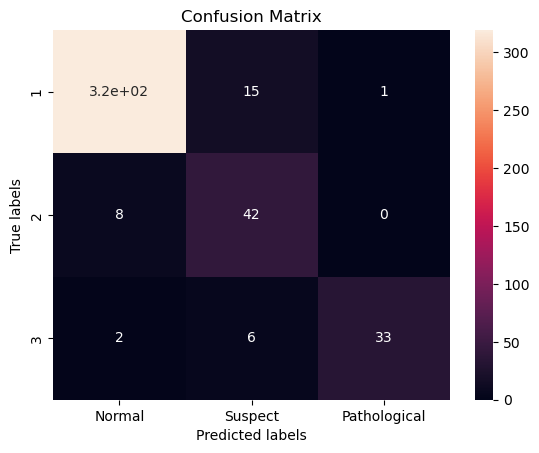

In [181]:
ax= plt.subplot()
sns.heatmap( confusion_matrix_svm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
ax.yaxis.set_ticklabels(["", "2", "3"]);

In [192]:
from yellowbrick.classifier import ClassPredictionError

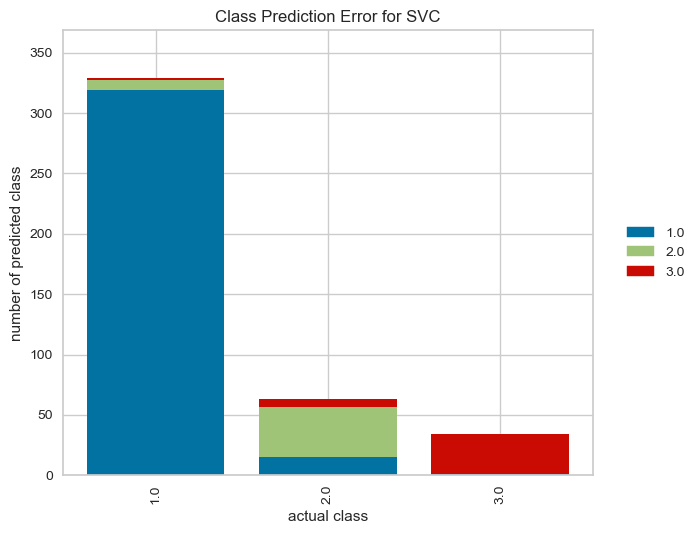

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [194]:
visualizer_svm = ClassPredictionError(
    SVC(C= 10, gamma = 0.1, kernel = 'rbf', probability = True)
)

# Fit the training data to the visualizer
visualizer_svm.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer_svm.score(X_test, y_test)

# Draw visualization
visualizer_svm.show()

### KNN best estimator

In [198]:
best_knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [183]:
y_pred_knn = best_knn.predict (X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       335
         2.0       0.60      0.70      0.65        50
         3.0       1.00      0.85      0.92        41

    accuracy                           0.91       426
   macro avg       0.85      0.83      0.84       426
weighted avg       0.91      0.91      0.91       426



In [184]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_knn

array([[316,  19,   0],
       [ 15,  35,   0],
       [  2,   4,  35]])

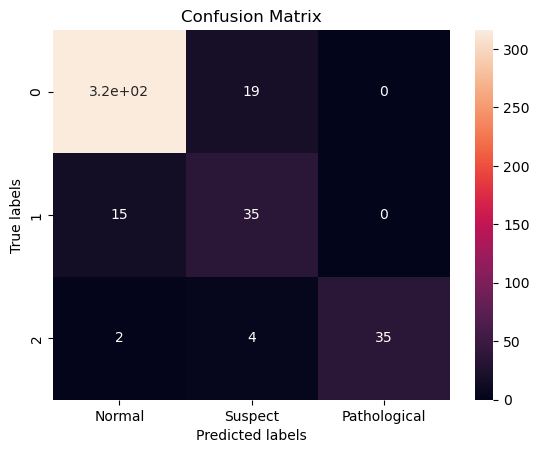

In [185]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

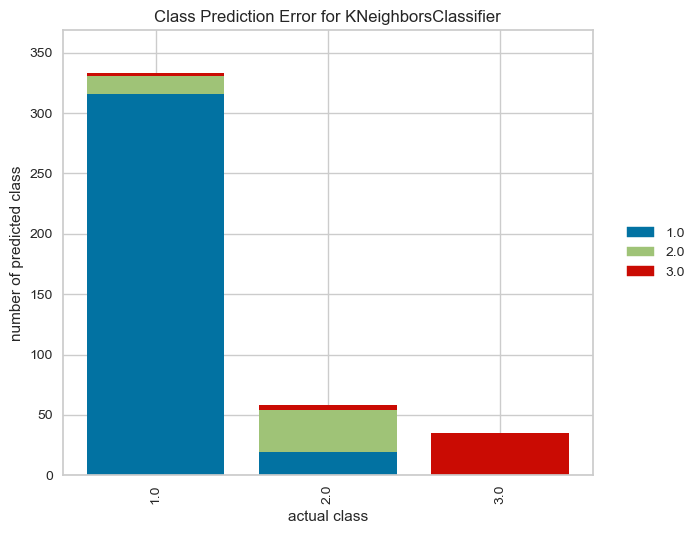

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [195]:
visualizer_knn = ClassPredictionError(
    KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
)

# Fit the training data to the visualizer
visualizer_knn.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer_knn.score(X_test, y_test)

# Draw visualization
visualizer_knn.show()

### Conclusion

SVM has scored best accuracy results. Most missclassification is in 'Suspect' class which is expected as it is better if someone is flagged early on but the result is good than not being picked up at all. 

Machine Learning models can be useful to help predict fetal health and possible complications - possible use by health professionals. 
Limited data  - no sociodemographic data, information about pregnancy or mother health.
Future improvement of ML algorithm using different models, larger dataset and feature selection.


### References

- Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

- Grivell RM, Alfirevic Z, Gyte GM, Devane D. Antenatal cardiotocography for fetal assessment. Cochrane Database Syst Rev. 2015 Sep 12;2015(9):CD007863. doi: 10.1002/14651858.CD007863.pub4. PMID: 26363287; PMCID: PMC6510058.

- Hoodbhoy Z, Noman M, Shafique A, Nasim A, Chowdhury D, Hasan B. Use of Machine Learning Algorithms for Prediction of Fetal Risk using Cardiotocographic Data. Int J Appl Basic Med Res. 2019 Oct-Dec;9(4):226-230. doi: 10.4103/ijabmr.IJABMR_370_18. Epub 2019 Oct 11. PMID: 31681548; PMCID: PMC6822315.

- https://geekymedics.com/how-to-read-a-ctg/


